In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
import sys
import os
sys.path.append(os.environ['HOME']+'/home/proj/stats/MCMC')
import data

In [5]:
plt.savefig?

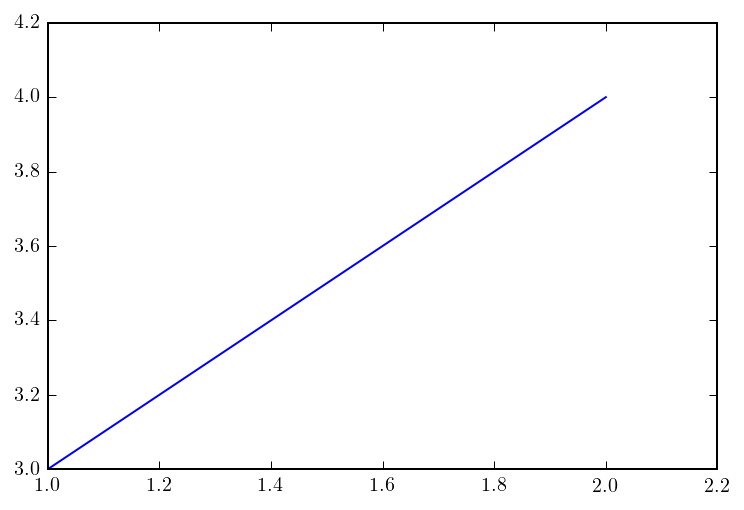

In [8]:
plt.plot([1,2],[3,4], label="line")
plt.savefig("line1.png")
plt.savefig("line300.png", dpi=300)
plt.savefig("line200.png", dpi=200)
plt.savefig("line.svg")

In [139]:
filename = "dat/herus_phot.dat"
#filename = "dat/herus_phot.csv"
with open(filename) as csvfile:
    is_csv = "," in csvfile.readline()
    csvfile.seek(0)
    if is_csv:
        hreader = csv.reader(csvfile)
        headers = np.array(next(hreader))
        ncol = len(headers)
    else:
        headers = np.array(csvfile.readline().split())
        ncol = len(headers)
        arr = np.loadtxt(csvfile,dtype='S')
        assert headers[0][0]=="#"
        headers[0] = headers[0][1:]
print headers
print ncol

['Name' 'ObsID' 'z' 'F250' 'E250' 'F350' 'E350' 'F500' 'E500' 'F100' 'F60'
 'E100' 'E60']
13


In [141]:
arr[0]

array(['IRAS00397-1312', '1342234696', '0.262', '0.389', '0.004', '0.130',
       '0.004', '0.040', '0.005', '1.9', '1.83', '0.17', '0.128'], 
      dtype='|S14')

In [211]:
reload(data)
dat1=data.readfluxes_DLC_2014("./dat/herus_phot.csv")
dat2=data.readfluxes_DLC_2014("./dat/herus_phot.dat")
dat3=data.readfluxes_DLC_2014("./dat/magdis_ulirgs.dat")

In [205]:
r = np.array(('IRAS00397-1312', 1342234696, 0.262, 0.389, 0.004, 0.13, 0.004, 0.04, 0.005, 1.9, 1.83, 0.17, 0.128), 
      dtype=[('f0', 'S14'), ('f1', '<i8'), ('f2', '<f8'), ('f3', '<f8'), ('f4', '<f8'), ('f5', '<f8'), ('f6', '<f8'), ('f7', '<f8'), ('f8', '<f8'), ('f9', '<f8'), ('f10', '<f8'), ('f11', '<f8'), ('f12', '<f8')])

In [146]:
lines = """
123456789012345678901234567890 12 123 1234 12345 123456
123456789012345678901234567890 12 123 1234 12345 123456
123456789012345678901234567890 12 123 1234 12345 123456
"""
from contextlib import closing
import cStringIO as StringIO
with closing(StringIO.StringIO(lines)) as f:
    arr = np.loadtxt(f,dtype='S')

print arr
print arr.dtype
### how does it pick the string length???

[['123456789012345678901234567890' '12' '123' '1234' '12345' '123456']
 ['123456789012345678901234567890' '12' '123' '1234' '12345' '123456']
 ['123456789012345678901234567890' '12' '123' '1234' '12345' '123456']]
|S30


In [193]:
Epat = r'^E\d+_|^E\d+$'   ### regex patterns -- still need to be corrected for the above.
Fpat = r'^F\d+_|^S\_\d+$|^F\d+$'
Zpat = r'Redshift|Redfshift|z|Z'


In [194]:
h1 = np.array(['Name', 'ObsID', 'z', 'F250', 'E250', 'F350', 'E350', 'F500',
       'E500', 'F100', 'F60', 'E100', 'E60'], 
      dtype='|S5')
h2 = np.array([s.replace('F','S_') for s in h1])
h3 = np.array([s+'_Jy' if re.match(r'^F|^E',s) else s for s in h1])
print h1
print h2
print h3

['Name' 'ObsID' 'z' 'F250' 'E250' 'F350' 'E350' 'F500' 'E500' 'F100' 'F60'
 'E100' 'E60']
['Name' 'ObsID' 'z' 'S_250' 'E250' 'S_350' 'E350' 'S_500' 'E500' 'S_100'
 'S_60' 'E100' 'E60']
['Name' 'ObsID' 'z' 'F250_Jy' 'E250_Jy' 'F350_Jy' 'E350_Jy' 'F500_Jy'
 'E500_Jy' 'F100_Jy' 'F60_Jy' 'E100_Jy' 'E60_Jy']


In [195]:
import re
for ih, hh in enumerate((h1, h2, h3)):
    fc = [i for i, h in enumerate(hh) if re.match(Fpat, h)]
    #print ih, fc
    print ih
    print np.array([float(hh[i].lstrip('FS_').rstrip('_Jy')) for i in fc]) 
    ec = [i for i, h in enumerate(hh) if re.match(Epat, h)]
    #print ih, fc
    print np.array([float(hh[i].lstrip('E_').rstrip('_Jy')) for i in ec]) 

0
[ 250.  350.  500.  100.   60.]
[ 250.  350.  500.  100.   60.]
1
[ 250.  350.  500.  100.   60.]
[ 250.  350.  500.  100.   60.]
2
[ 250.  350.  500.  100.   60.]
[ 250.  350.  500.  100.   60.]


In [229]:
print(dat3[6].d)
print(dat3[6].sig)
print(data.speed_of_light/dat3[6].freq_obs)


[  3.3  65.   80.6  29.6]
[ 0.4  0.3  2.4  6. ]
[  24.   70.  250.  350.]
